# 06. jhanvi831/Software-Engineer-Salary-Prediction

## Predictions with ML Regression Models | Series 1 - survey_results_public.csv

In [452]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Lasso, Ridge, QuantileRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, get_scorer_names
df = pd.read_csv('06_survey_results_public.csv')

In [453]:
# First 5 rows of the dataset
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [454]:
# Last 5 rows of the dataset
df.tail()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0
83438,83439,I am a developer by profession,Employed full-time,Brazil,NaN,NaN,"Professional degree (JD, MD, etc.)",11 - 17 years,School,14,...,18-24 years old,Man,No,Straight / Heterosexual,Hispanic or Latino/a/x,None of the above,None of the above,Appropriate in length,Easy,21168.0


In [455]:
# All available columns, their counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

## Preprocessing

All preprocessing steps were carried out in almost exactly the same way as the author.

In [456]:
# Take only the meaningful columns:
# country, education level, years of coding as professional, employment type & converted comp. yearly
df_sub = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
# ConvertedCompYearly will be renamed to Salary
df_sub = df_sub.rename({"ConvertedCompYearly": "Salary"}, axis=1)
print("DATASET SHAPE:", df_sub.shape)
df_sub.head(10)

DATASET SHAPE: (83439, 5)


,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN
5,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, part-time",NaN
6,United States of America,"Secondary school (e.g. American high school, G...",NaN,I prefer not to say,NaN
7,Malaysia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
8,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed part-time,NaN
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0


In [457]:
# Rows with null salaries will be removed
df_sub = df_sub[df_sub['Salary'].notnull()]
print("DATASET SHAPE AFTER REMOVAL OF NULL SALARIES:", df_sub.shape)
df_sub.head(10)

DATASET SHAPE AFTER REMOVAL OF NULL SALARIES: (46844, 5)


,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Employed full-time,46135.0
18,Singapore,"Other doctoral degree (Ph.D., Ed.D., etc.)",30,I prefer not to say,160932.0
23,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,Employed full-time,38915.0
24,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18,Employed full-time,77831.0
26,Switzerland,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,Employed full-time,81319.0


In [458]:
# Info about the current dataset
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [459]:
# Check if there are any null values in other columns
df_sub.isnull().sum()

Country           0
EdLevel          21
YearsCodePro    453
Employment       13
Salary            0
dtype: int64

In [460]:
# Then, remove those rows containing null values. There should be no more...
df_sub = df_sub.dropna()
print("DATASET SHAPE AFTER REMOVAL OF ROWS WITH NULL:", df_sub.shape)
df_sub.isnull().sum()

DATASET SHAPE AFTER REMOVAL OF ROWS WITH NULL: (46359, 5)


Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [461]:
# Also, select such rows where person was employed as full time
df_sub = df_sub[df_sub["Employment"] == "Employed full-time"]
df_sub = df_sub.drop("Employment", axis=1)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40211 non-null  object 
 1   EdLevel       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Salary        40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [462]:
# Let's count the countries
print("#### 10 MOST FREQUENT COUNTRIES ####")
print(df_sub['Country'].value_counts()[:10])
print("#### 10 LEAST FREQUENT COUNTRIES ####")
print(df_sub['Country'].value_counts(ascending=True)[:10])

#### 10 MOST FREQUENT COUNTRIES ####
United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
France                                                  1396
Brazil                                                  1340
Spain                                                    890
Netherlands                                              835
Australia                                                825
Name: Country, dtype: int64
#### 10 LEAST FREQUENT COUNTRIES ####
Burundi                             1
Monaco                              1
Libyan Arab Jamahiriya              1
Mauritania                          1
Dominica                            1
Guinea                              1
Somalia                             1
Saint Lucia          

In [463]:
# Let's filter the countries such that their counts lower than the cutoff value are moved to 'Other'
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [464]:
# After that, we have these counts of countries as below
country_map = shorten_categories(df_sub['Country'].value_counts(), 400)
# print(country_map)
print("CURRENT DATASET SHAPE:", df_sub.shape)
df_sub['Country'] = df_sub['Country'].map(country_map)
df_sub['Country'].value_counts()

CURRENT DATASET SHAPE: (40211, 4)


Other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

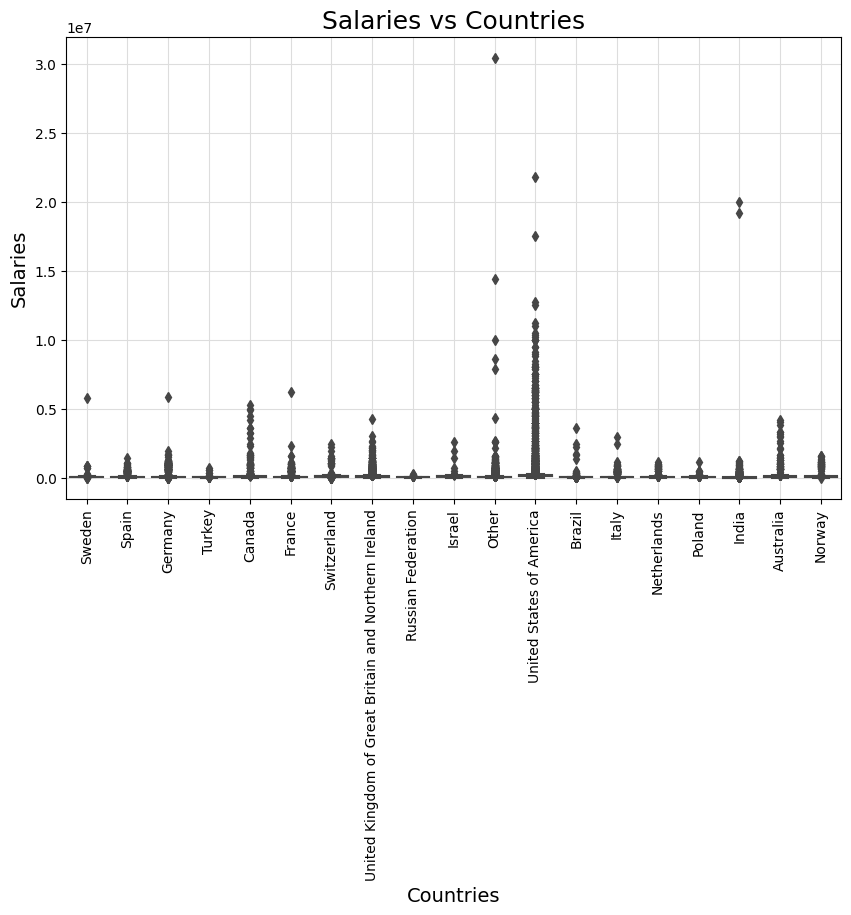

In [465]:
# Box plot visualization: Salaries vs Countries
plt.figure(figsize=(10,6))
sns.boxplot(data=df_sub, x='Country', y='Salary')
plt.title("Salaries vs Countries", fontsize=18)
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Salaries', fontsize=14)
plt.xticks(rotation=90)
plt.grid(color='#dddddd')
plt.show()

In [466]:
# There are lots of outliers encountered above. It's better to remove them all!
df_sub = df_sub[df_sub["Salary"] <= 200000]
df_sub = df_sub[df_sub["Salary"] >= 10000]
df_sub = df_sub[df_sub['Country'] != 'Other']  # Even other countries are dropped as well

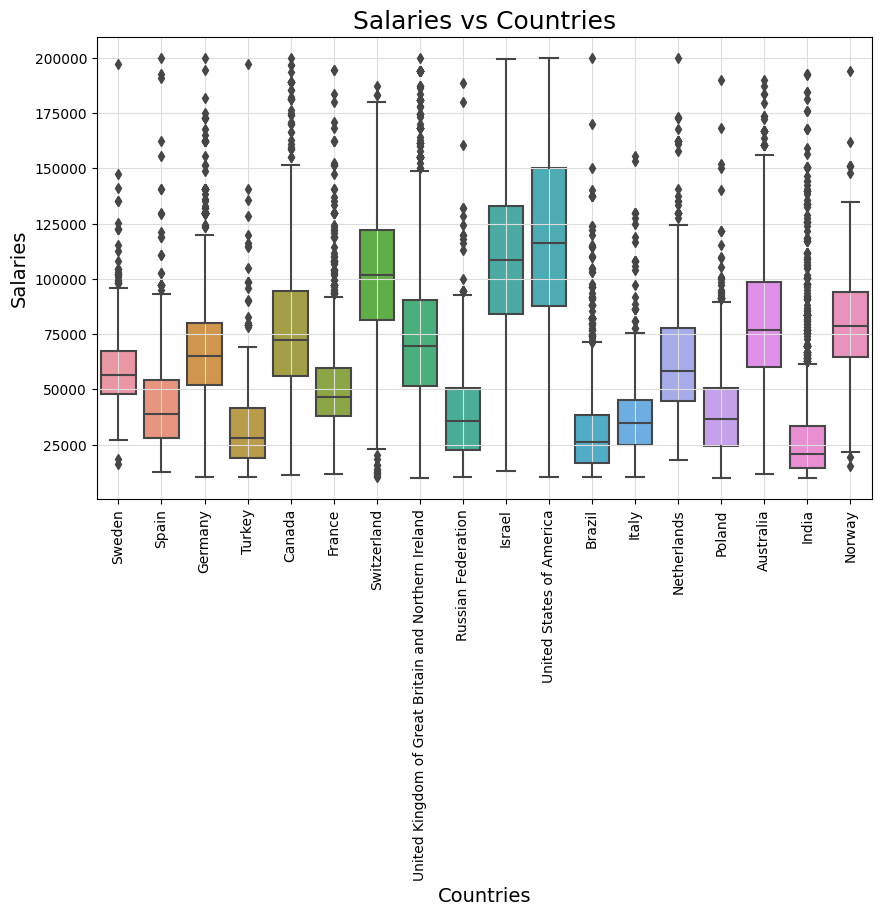

In [467]:
# Updated Box plot visualization: Salaries vs Countries
plt.figure(figsize=(10,6))
sns.boxplot(data=df_sub, x='Country', y='Salary')
plt.title("Salaries vs Countries", fontsize=18)
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Salaries', fontsize=14)
plt.xticks(rotation=90)
plt.grid(color='#dddddd')
plt.show()

In [468]:
print("CURRENT DATASET SHAPE:", df_sub.shape)

CURRENT DATASET SHAPE: (25580, 4)


In [469]:
# Let's check the unique values of 'years of coding as professional' column (note the data type: object)
df_sub["YearsCodePro"].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '12', '8', '17', '1', '14', '26', '34', '11', '25',
       '24', '22', '13', '9', '7', '39', '20', '27', '23', '30', '19',
       '35', '33', '43', '40', '29', '38', '31', '42', '28', '46', '32',
       '36', '37', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [470]:
# It's better to convert the such texts into numbers, so it can be processed appropriately.
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)
df_sub['YearsCodePro'] = df_sub['YearsCodePro'].apply(clean_experience)

In [471]:
df_sub["YearsCodePro"].unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5,  3. , 15. ,
       12. ,  8. , 17. ,  1. , 14. , 26. , 34. , 11. , 25. , 24. , 22. ,
       13. ,  9. ,  7. , 39. , 20. , 27. , 23. , 30. , 19. , 35. , 33. ,
       43. , 40. , 29. , 38. , 31. , 42. , 28. , 46. , 32. , 36. , 37. ,
       47. , 45. , 44. , 41. , 50. , 49. , 48. ])

In [472]:
# How about education levels?
df_sub["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [473]:
# Well, these need to be simplified, thus they can be handled easily
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'
df_sub['EdLevel'] = df_sub['EdLevel'].apply(clean_education)

In [474]:
df_sub["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Post grad',
       'Less than a Bachelors'], dtype=object)

In [475]:
# But, that's not enough! Continue by encoding the education levels...
le_education = LabelEncoder()
df_sub['EdLevel'] = le_education.fit_transform(df_sub['EdLevel'])
df_sub["EdLevel"].unique()

array([2, 0, 3, 1])

In [476]:
# Then, encode the countries
le_country = LabelEncoder()
df_sub['Country'] = le_country.fit_transform(df_sub['Country'])
df_sub["Country"].unique()

array([13, 12,  4, 15,  2,  3, 14, 16, 11,  6, 17,  1,  7,  8, 10,  0,  5,
        9])

In [477]:
# Current status of our dataset
print("CURRENT DATASET SHAPE:", df_sub.shape)
df_sub.head(10)

CURRENT DATASET SHAPE: (25580, 4)


,Country,EdLevel,YearsCodePro,Salary
9,13,2,4.0,51552.0
11,12,0,5.0,46482.0
12,4,2,6.0,77290.0
16,15,0,2.0,17748.0
17,2,0,6.0,46135.0
23,3,2,2.0,38915.0
24,4,2,18.0,77831.0
26,14,2,5.0,81319.0
27,16,0,21.0,68507.0
29,11,2,16.0,37752.0


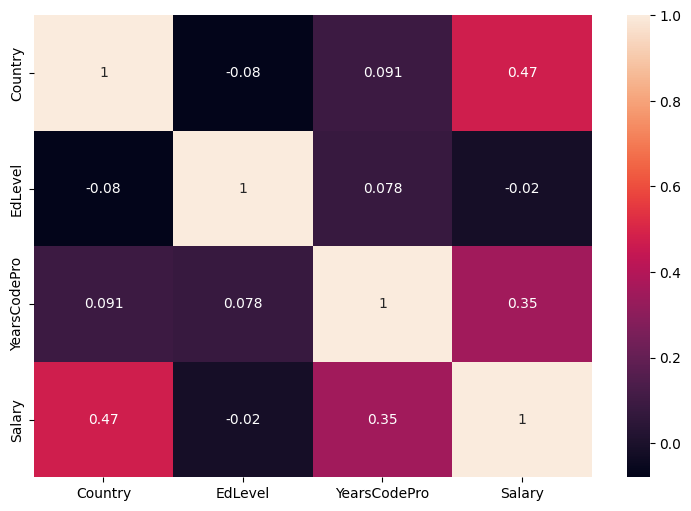

In [478]:
# The correlations of all presented columns
plt.figure(figsize=(9,6))
sns.heatmap(df_sub.corr(), annot=True)
plt.show()

## Prepare Train and Test Sets

In [479]:
# Use 80% of the dataset as training, and 20% as testing
X = df_sub.drop(columns='Salary', axis=1)
Y = df_sub.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
print("TRAIN SIZE:", x_train.shape, y_train.shape, "  TEST SIZE:", x_test.shape, y_test.shape)

TRAIN SIZE: (20464, 3) (20464,)   TEST SIZE: (5116, 3) (5116,)


In [480]:
# Create lists to store results of error values of all regression methods
res_mse, res_rmse, res_mae, res_r2, res_cv_train, res_cv_test = [], [], [], [], [], []

# ML Regression Models

## 1 - Linear Regression

In [481]:
linreg = LinearRegression()
linreg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [482]:
# Fit the training data into the linear reg. model, then make predictions on the test data
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

In [483]:
print("COEF:", linreg.coef_)   # Estimated coefficients for the linear reg.
print("RANK:", linreg.rank_)   # Rank of matrix
print("INTERCEPT:", linreg.intercept_)   # Independent term in the linear model

COEF: [3278.31523413 -412.82651839 1800.69981412]
RANK: 3
INTERCEPT: 26305.088439949024


In [484]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

    38909.9871387758 |  69482.0
   56599.69448085972 | 108098.0
   96442.04593301914 | 189000.0
   91039.94649066479 | 115000.0
   40710.68695289391 |  47412.0
   107246.2448177278 | 200000.0
  114359.30194992622 |  84019.0
   74923.98342113804 |  80172.0
   36214.73101261264 |  37834.0
   61032.54074088042 |  43239.0
   108957.2025075719 | 148648.0
   87438.54686242857 | 150000.0
  108221.29159507545 | 183000.0
   46118.57999026225 |  64859.0
   47596.19541026915 |  70264.0
  109609.16489080832 | 150000.0
    88916.7554156977 |  66810.0
     88084.715650651 |  45360.0
  54978.478915289656 |  84000.0
   42930.00688041127 |  38916.0


In [485]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         # Mean squared error
print("RMSE:", rmse)       # Root mean squared error
print("MAE:", mae)         # Mean absolute error
print("R2 SCORE:", r2)     # R2 score
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(linreg, X, Y, cv=5, return_train_score=True)    # 5-fold Cross Validation
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1404218336.998113
RMSE: 37472.90136883069
MAE: 29892.24168696996
R2 SCORE: 0.31135281947556503

# CROSS VALIDATION #
FITTING TIME: [0.00507379 0.00553894 0.00353789 0.00653315 0.00351   ] -> 0.004838752746582031
SCORING TIME: [0.00198174 0.00200534 0.00197673 0.00199986 0.00100613] -> 0.0017939567565917968
TRAIN SCORE: [0.33274989 0.32095542 0.32653378 0.31196476 0.31267897] -> 0.320976562027646
TEST SCORE: [0.27320858 0.31280734 0.29142507 0.326669   0.35434307] -> 0.3116906099556931


## 2 - Lasso Regression

In [486]:
lasso = Lasso()
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [487]:
# Fit the training data into the lasso model, then make predictions on the test data
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

In [488]:
print("COEF:", lasso.coef_)   # Parameter vector (w in the cost function function formula)
print("INTERCEPT:", lasso.intercept_)   # Independent term in decision function
# Number of iterations run by the coord. descent solver to reach the specified tolerance
print("ITERATIONS:", lasso.n_iter_)  

COEF: [3278.3066434  -411.77427078 1800.67470573]
INTERCEPT: 26304.466131100533
ITERATIONS: 5


In [489]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  38909.189071224086 |  69482.0
    56600.8912204501 | 108098.0
   96441.07671472593 | 189000.0
   91039.05259753013 | 115000.0
   40709.86377695603 |  47412.0
  107245.12494911755 | 200000.0
  114359.09226932959 |  84019.0
   74922.68318586281 |  80172.0
   36216.17487259848 |  37834.0
  61033.787033448985 |  43239.0
  108957.06815213377 | 148648.0
   87437.70318606625 | 150000.0
  108222.25111328678 | 183000.0
   46119.88575412413 |  64859.0
   47597.51769179042 |  70264.0
  109611.15154823735 | 150000.0
   88916.30656093697 |  66810.0
   88083.78872219754 |  45360.0
    54977.6795201496 |  84000.0
  42930.310613441616 |  38916.0


In [490]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)          
print("RMSE:", rmse)       
print("MAE:", mae)        
print("R2 SCORE:", r2)
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(lasso, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1404217892.357005
RMSE: 37472.89543599487
MAE: 29892.245128884842
R2 SCORE: 0.3113530375334248

# CROSS VALIDATION #
FITTING TIME: [0.02042437 0.00600863 0.0085175  0.00752378 0.00802398] -> 0.010099649429321289
SCORING TIME: [0.00198746 0.00201106 0.00199866 0.00100017 0.0010066 ] -> 0.001600790023803711
TRAIN SCORE: [0.33274989 0.32095542 0.32653378 0.31196476 0.31267897] -> 0.32097656149823744
TEST SCORE: [0.2732077  0.31280848 0.29142568 0.32666771 0.35434341] -> 0.31169059647440733


## 3 - Ridge Regression

In [491]:
ridge = Ridge()
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [492]:
# Fit the training data into the ridge model, then make predictions on the test data
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

In [493]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function
print("ITERATIONS:", ridge.n_iter_)   # Actual number of iterations for each target. (Only for 'sag' & 'lsqr' solvers)

COEF: [3278.31146518 -412.80672365 1800.69848524]
INTERCEPT: 26305.121594975455
ITERATIONS: None


In [494]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

    38910.0109916211 |  69482.0
   56599.73886073227 | 108098.0
   96442.00438486559 | 189000.0
   91039.90892916032 | 115000.0
  40710.709476856195 |  47412.0
  107246.19529627614 | 200000.0
  114359.26801885858 |  84019.0
   74923.98069632295 |  80172.0
   36214.79178582187 |  37834.0
  61032.577800558065 |  43239.0
  108957.17256315329 | 148648.0
   87438.51195869013 | 150000.0
  108221.28033420903 | 183000.0
   46118.63345461487 |  64859.0
   47596.24643455681 |  70264.0
  109609.17209579302 | 150000.0
   88916.76185455258 |  66810.0
   88084.68296927644 |  45360.0
   54978.48281221306 |  84000.0
  42930.043207795796 |  38916.0


In [495]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1404218295.8742
RMSE: 37472.90082011533
MAE: 29892.24135053223
R2 SCORE: 0.311352839643274

# CROSS VALIDATION #
FITTING TIME: [0.00402904 0.00157261 0.00351667 0.00300598 0.00301719] -> 0.0030282974243164063
SCORING TIME: [0.00199223 0.00197721 0.00203729 0.00099397 0.00100136] -> 0.0016004085540771485
TRAIN SCORE: [0.33274989 0.32095542 0.32653378 0.31196476 0.31267897] -> 0.3209765620270887
TEST SCORE: [0.2732086  0.31280737 0.29142512 0.32666894 0.35434304] -> 0.3116906151909892


## 4 - Polynomial Regression

In [496]:
poly_feat = PolynomialFeatures(degree=2)
poly_feat.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

In [497]:
# Fit then transform for both training and test data (the number of columns must increase)
x_poly_train = poly_feat.fit_transform(x_train)
x_poly_test = poly_feat.fit_transform(x_test)
print(x_poly_train.shape, x_poly_test.shape)

(20464, 10) (5116, 10)


### Polynomial Regression with Lasso

In [498]:
lasso = Lasso()
lasso.fit(x_poly_train, y_train)
y_poly_pred = lasso.predict(x_poly_test)

In [499]:
print("COEF:", lasso.coef_)   # Parameter vector (w in the cost function function formula)
print("INTERCEPT:", lasso.intercept_)   # Independent term in decision function
# Number of iterations run by the coord. descent solver to reach the specified tolerance
print("ITERATIONS:", lasso.n_iter_) 

COEF: [    0.         -9277.66778308  -284.15458741  3698.72379804
   647.74582671   -86.88197463    17.61762528  1575.23424705
  -102.77963458   -72.48145129]
INTERCEPT: 52257.32720290439
ITERATIONS: 406


In [500]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_poly_pred), mean_squared_error(y_test, y_poly_pred, squared=False), \
    mean_absolute_error(y_test, y_poly_pred), r2_score(y_test, y_poly_pred)
print("MSE:", mse)          
print("RMSE:", rmse)     
print("MAE:", mae)         
print("R2 SCORE:", r2)    
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(lasso, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1163038849.499711
RMSE: 34103.355399428234
MAE: 26726.336651986912
R2 SCORE: 0.4296304189699276

# CROSS VALIDATION #
FITTING TIME: [0.01222181 0.00699472 0.00750899 0.00703907 0.00605893] -> 0.007964706420898438
SCORING TIME: [0.00168419 0.00155568 0.00103259 0.00200081 0.00117016] -> 0.0014886856079101562
TRAIN SCORE: [0.33274989 0.32095542 0.32653378 0.31196476 0.31267897] -> 0.32097656149823744
TEST SCORE: [0.2732077  0.31280848 0.29142568 0.32666771 0.35434341] -> 0.31169059647440733


### Polynomial Regression with Ridge

In [501]:
ridge = Ridge()
ridge.fit(x_poly_train, y_train)
y_poly_pred = ridge.predict(x_poly_test)

In [502]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function
print("ITERATIONS:", ridge.n_iter_)   # Actual number of iterations for each target. (Only for 'sag' & 'lsqr' solvers)

COEF: [    0.         -9278.14591927  -301.17562297  3698.7839294
   647.75627176   -86.62738396    17.61877892  1580.66261866
  -102.71197917   -72.4851215 ]
INTERCEPT: 52263.47367886397
ITERATIONS: None


In [503]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_poly_pred), mean_squared_error(y_test, y_poly_pred, squared=False), \
    mean_absolute_error(y_test, y_poly_pred), r2_score(y_test, y_poly_pred)
print("MSE:", mse)        
print("RMSE:", rmse)       
print("MAE:", mae)          
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1163034950.384839
RMSE: 34103.29823323309
MAE: 26726.301378714026
R2 SCORE: 0.4296323311472524

# CROSS VALIDATION #
FITTING TIME: [0.00400352 0.00401354 0.00253892 0.00295758 0.00346065] -> 0.0033948421478271484
SCORING TIME: [0.00099969 0.00099969 0.0009799  0.00099826 0.00102091] -> 0.0009996891021728516
TRAIN SCORE: [0.33274989 0.32095542 0.32653378 0.31196476 0.31267897] -> 0.3209765620270887
TEST SCORE: [0.2732086  0.31280737 0.29142512 0.32666894 0.35434304] -> 0.3116906151909892


## 5 - Decision Tree Regression

In [504]:
# dtree = DecisionTreeRegressor(criterion='absolute_error', splitter='random', max_depth=None, min_samples_split=2,
#                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', max_leaf_nodes=10,
#                              min_impurity_decrease=0.2, ccp_alpha=0.0)
dtree = DecisionTreeRegressor()
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [505]:
# Fit the training data into the decision tree, then make predictions on the test data
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

In [506]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   81396.46666666666 |  69482.0
   78603.14285714286 | 108098.0
  125565.46242774566 | 189000.0
  108410.38888888889 | 115000.0
   81632.08695652174 |  47412.0
   131443.0985915493 | 200000.0
   94430.94444444444 |  84019.0
           122762.75 |  80172.0
  30416.333333333332 |  37834.0
             35402.0 |  43239.0
             93995.6 | 148648.0
   98282.39252336448 | 150000.0
  135508.94545454546 | 183000.0
            55746.66 |  64859.0
   65250.80952380953 |  70264.0
             71000.0 | 150000.0
             72823.0 |  66810.0
   39343.61538461538 |  45360.0
            97793.25 |  84000.0
             35110.2 |  38916.0


In [507]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(dtree, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 851003207.8188727
RMSE: 29171.959272885197
MAE: 21425.602538766696
R2 SCORE: 0.5826568103828258

# CROSS VALIDATION #
FITTING TIME: [0.01658392 0.01673031 0.01451302 0.0155704  0.01454186] -> 0.015587902069091797
SCORING TIME: [0.00202703 0.00197005 0.00200415 0.00197601 0.00152946] -> 0.0019013404846191407
TRAIN SCORE: [0.66714392 0.6521666  0.65458312 0.65189324 0.6513408 ] -> 0.6554255328537429
TEST SCORE: [0.53024698 0.59257018 0.57659243 0.58271178 0.60242326] -> 0.5769089254623834


## 6 - Random Forest Regression

In [508]:
# rforest = RandomForestRegressor(n_estimators=100, criterion='friedman_mse', max_depth=20, min_samples_split=4, 
#                                 min_samples_leaf=4, min_weight_fraction_leaf=0.1, max_features=None, max_leaf_nodes=None,
#                                 bootstrap=True, warm_start=False, ccp_alpha=0.2, max_samples=None)
rforest = RandomForestRegressor()
rforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [509]:
# Fit the training data into the random forest, then make predictions on the test data
rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)

In [510]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   82269.70772169296 |  69482.0
    78569.8228465926 | 108098.0
  125864.71329041503 | 189000.0
  108395.38650201575 | 115000.0
   82990.95432116157 |  47412.0
  131113.47691277563 | 200000.0
   94696.34615103819 |  84019.0
  123122.61420670991 |  80172.0
   30313.34564295319 |  37834.0
   35202.87036688312 |  43239.0
   95134.45987950938 | 148648.0
   98389.88952238124 | 150000.0
  135283.35279731362 | 183000.0
   55778.18278483168 |  64859.0
   65201.49563068212 |  70264.0
   96302.66984607825 | 150000.0
           79080.848 |  66810.0
   41305.58557299654 |  45360.0
   98247.93952166908 |  84000.0
   34830.22313095237 |  38916.0


In [511]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(rforest, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 824823485.6838169
RMSE: 28719.740348474894
MAE: 21157.097006515298
R2 SCORE: 0.5954956911752246

# CROSS VALIDATION #
FITTING TIME: [1.05075264 1.04777575 1.03994322 1.07603836 1.08592606] -> 1.0600872039794922
SCORING TIME: [0.06852508 0.0713191  0.07267475 0.07190752 0.08982253] -> 0.07484979629516601
TRAIN SCORE: [0.66543571 0.65002975 0.65259037 0.64984698 0.64955182] -> 0.6534909241263475
TEST SCORE: [0.54057637 0.60394492 0.58734003 0.59579843 0.61172018] -> 0.5878759862006596


## 7 - KNN Regression

In [512]:
knnreg = KNeighborsRegressor()
knnreg.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [513]:
# Fit the training data into the KNN regression model, then make predictions on the test data
knnreg.fit(x_train, y_train)
y_pred = knnreg.predict(x_test)

In [514]:
# The distance metric to use. It will be the same as the 'metric' parameter or a synonym of it, e.g. 'euclidean' if the
# metric parameter set to 'minkowski' and 'p' parameter is set to 2.
print("EFFECTIVE METRIC:", knnreg.effective_metric_)
# Additional keyword arguments for the metric function. For most metrics will be same with 'metric_params' parameter,
# but may also contain the 'p' parameter value if the 'effective_metric_' attribute is set to 'miknowski'.
print("EFFECTIVE METRIC PARAMS:", knnreg.effective_metric_params_)
print("FEATURES:", knnreg.n_features_in_)  # Number of features seen during fit
print("FEATURE NAMES:", knnreg.feature_names_in_)  # Names of features seen during fit
print("SAMPLES FIT:", knnreg.n_samples_fit_)  # Number of samples in the fitted data

EFFECTIVE METRIC: euclidean
EFFECTIVE METRIC PARAMS: {}
FEATURES: 3
FEATURE NAMES: ['Country' 'EdLevel' 'YearsCodePro']
SAMPLES FIT: 20464


In [515]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

             77699.6 |  69482.0
             91234.8 | 108098.0
            157000.0 | 189000.0
            114400.0 | 115000.0
             81107.0 |  47412.0
            144200.0 | 200000.0
             89447.6 |  84019.0
            114244.6 |  80172.0
             25696.8 |  37834.0
             32732.8 |  43239.0
             93995.6 | 148648.0
             67955.2 | 150000.0
            101841.4 | 183000.0
             61183.4 |  64859.0
             64084.2 |  70264.0
            137222.2 | 150000.0
             89391.4 |  66810.0
             51088.8 |  45360.0
            108568.8 |  84000.0
             35110.2 |  38916.0


In [516]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(knnreg, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 945672800.7366457
RMSE: 30751.793455612402
MAE: 22486.907701329164
R2 SCORE: 0.5362295942395088

# CROSS VALIDATION #
FITTING TIME: [0.02210999 0.01705217 0.01773024 0.01756907 0.01769662] -> 0.018431615829467774
SCORING TIME: [0.02880359 0.02524137 0.02322173 0.02455568 0.02606988] -> 0.02557845115661621
TRAIN SCORE: [0.592653   0.5570698  0.57451764 0.57033384 0.56632381] -> 0.5721796203252181
TEST SCORE: [0.47670446 0.51800082 0.53046507 0.52423282 0.52989812] -> 0.5158602591509626


## 8 - Gradient Boosting

In [517]:
gradBoost = GradientBoostingRegressor()
gradBoost.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [518]:
# Fit the training data into the Gradient boosting regression model, then make predictions on the test data
gradBoost.fit(x_train, y_train)
y_pred = gradBoost.predict(x_test)

In [519]:
print("INIT:", gradBoost.init_)  # The estimator that provides the initial predictions
print("ESTIMATORS (FIRST 5):\n{}".format(gradBoost.estimators_[:5]))  # The collection of fitted sub-estimators
# The number of estimators as selected by early stopping (if 'n_iter_no_change' is specified).
# Otherwise, it is set to 'n_estimators'
print("# OF ESTIMATORS:", gradBoost.n_estimators_)
print("# OF FEATURES:", gradBoost.n_features_in_)  # Number of features seen during fit
print("MAX FEATURES:", gradBoost.max_features_)  # The inferred value of max_features
print("FEATURE IMPORTANCES:", gradBoost.feature_importances_)  # The impurity-based feature importances
# The i'th score 'train_score[i]' is the loss of the model at iteration i on the in-bag sample.
# If subsample == 1, this is the loss on the training data.
print("TRAIN SCORE:\n{}".format(gradBoost.train_score_))

INIT: DummyRegressor()
ESTIMATORS (FIRST 5):
[[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x23EB2B02440)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x23EB2B02440)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x23EB2B02440)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x23EB2B02440)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x23EB2B02440)]]
# OF ESTIMATORS: 100
# OF FEATURES: 3
MAX FEATURES: 3
FEATURE IMPORTANCES: [0.80896203 0.01302359 0.17801438]
TRAIN SCORE:
[1.87086443e+09 1.71886100e+09 1.59490770e+09 1.49381354e+09
 1.41133577e+09 1.34362740e+09 1.28778785e+09 1.24212929e+09
 1.204383

In [520]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   76896.26693277963 |  69482.0
   73910.38134015667 | 108098.0
  125648.41189866792 | 189000.0
  108097.07669676433 | 115000.0
    79229.9685313311 |  47412.0
  131171.61182665025 | 200000.0
   86761.49861832052 |  84019.0
  100835.83096147157 |  80172.0
   36706.48623261287 |  37834.0
   44422.58510321546 |  43239.0
   86210.55219232905 | 148648.0
    98230.0550792079 | 150000.0
  137279.11535459533 | 183000.0
  53973.781127793605 |  64859.0
  64682.905449980135 |  70264.0
   139558.2333861344 | 150000.0
   98813.03929730406 |  66810.0
   44955.70580631011 |  45360.0
   92879.79674765201 |  84000.0
    41822.2529856576 |  38916.0


In [521]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(gradBoost, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 792979420.3062683
RMSE: 28159.890275110596
MAE: 20828.64876429225
R2 SCORE: 0.611112440551653

# CROSS VALIDATION #
FITTING TIME: [0.4971869  0.49495149 0.49329996 0.48064518 0.48533034] -> 0.4902827739715576
SCORING TIME: [0.01060176 0.0105722  0.00951958 0.00861382 0.00858688] -> 0.009578847885131836
TRAIN SCORE: [0.62719616 0.61166886 0.61511242 0.61115973 0.61280334] -> 0.6155881015470428
TEST SCORE: [0.56358903 0.61879183 0.6103431  0.61341002 0.6273147 ] -> 0.6066897368066979


## 9 - XGBoost

In [522]:
xgb = xgboost.XGBRegressor()
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [523]:
# Fit the training data into the extreme gradient boosting regression model, then make predictions on the test data
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [524]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

       82057.8828125 |  69482.0
        80753.890625 | 108098.0
      125122.1953125 | 189000.0
      108910.7109375 | 115000.0
       79794.9921875 |  47412.0
      130230.1640625 | 200000.0
       89801.3828125 |  84019.0
      119303.4609375 |  80172.0
      29956.78515625 |  37834.0
         39531.34375 |  43239.0
        83642.890625 | 148648.0
       98428.7734375 | 150000.0
       136424.765625 | 183000.0
      53607.75390625 |  64859.0
      63987.31640625 |  70264.0
        113297.71875 | 150000.0
         77486.34375 |  66810.0
        41322.890625 |  45360.0
        96857.265625 |  84000.0
      36902.90234375 |  38916.0


In [525]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(xgb, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 803029528.4103857
RMSE: 28337.775643306686
MAE: 20767.66126204096
R2 SCORE: 0.6061837350736562

# CROSS VALIDATION #
FITTING TIME: [0.11077189 0.08768415 0.08973527 0.08883953 0.08916068] -> 0.09323830604553222
SCORING TIME: [0.00500941 0.00499892 0.00401187 0.0049994  0.00500464] -> 0.004804849624633789
TRAIN SCORE: [0.65740268 0.64252977 0.64475971 0.64187667 0.64186795] -> 0.6456873561197756
TEST SCORE: [0.55180472 0.61379306 0.59965172 0.60638124 0.62137076] -> 0.5986003007745474


## Results of Metrics of All ML Models Together

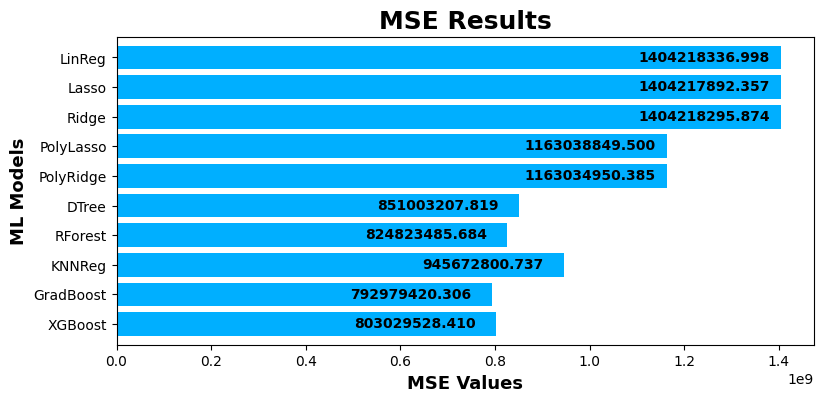

In [526]:
methods = ['LinReg', 'Lasso', 'Ridge', 'PolyLasso', 'PolyRidge', 'DTree', 'RForest', 'KNNReg', 'GradBoost', 'XGBoost']
plt.figure(figsize=(9,4))
plt.barh(range(10), res_mse, color='#00afff')
plt.title("MSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('MSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_mse[i]-300000000, i+0.12, "{:.3f}".format(res_mse[i]), fontweight='bold')
plt.show()

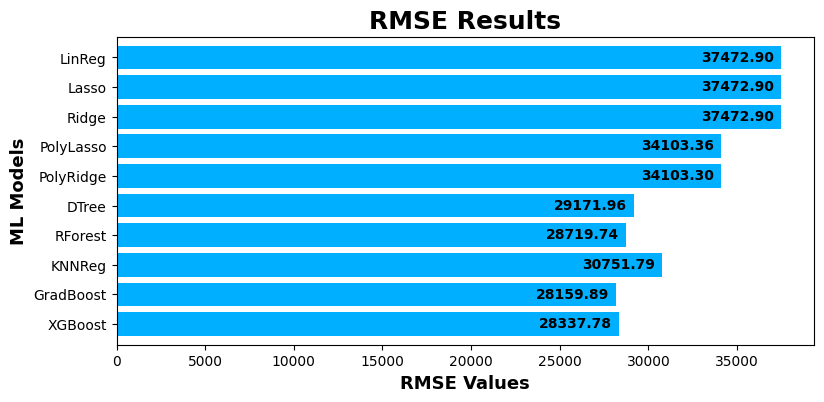

In [527]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_rmse, color='#00afff')
plt.title("RMSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('RMSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_rmse[i]-4500, i+0.12, "{:.2f}".format(res_rmse[i]), fontweight='bold')
plt.show()

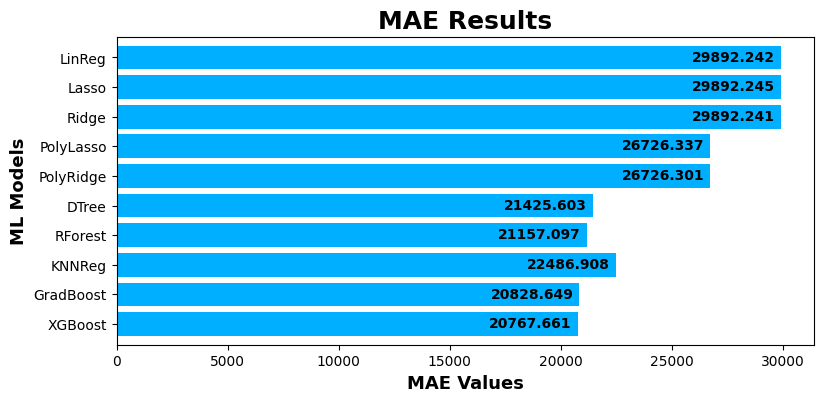

In [528]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_mae, color='#00afff')
plt.title("MAE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('MAE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_mae[i]-4000, i+0.12, "{:.3f}".format(res_mae[i]), fontweight='bold')
plt.show()

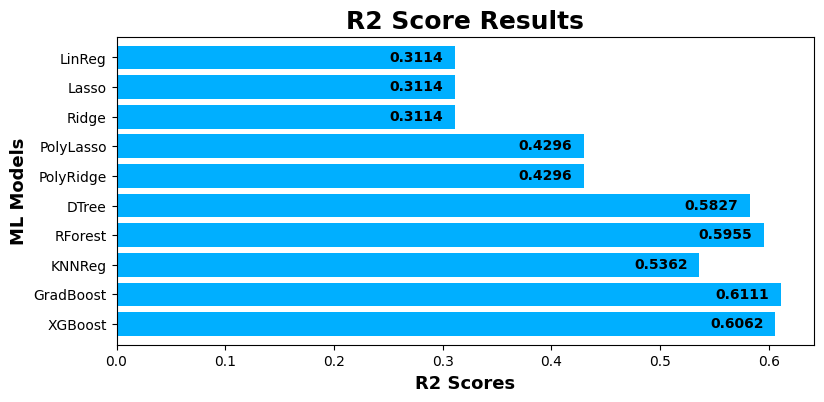

In [529]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_r2, color='#00afff')
plt.title("R2 Score Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('R2 Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_r2[i]-0.06, i+0.12, "{:.4f}".format(res_r2[i]), fontweight='bold')
plt.show()

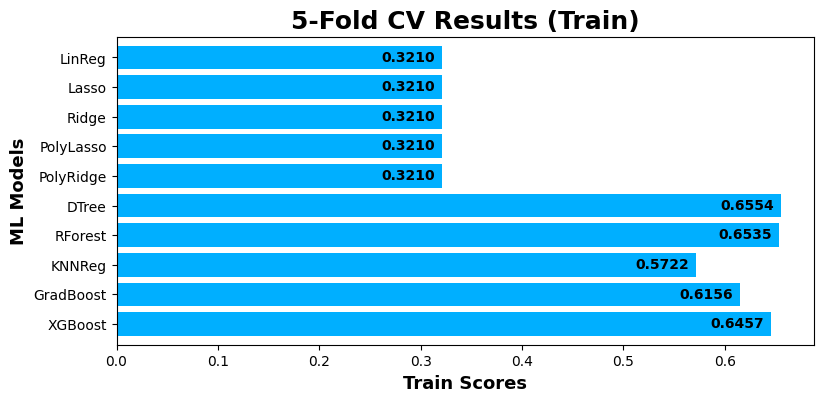

In [530]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_cv_train, color='#00afff')
plt.title("5-Fold CV Results (Train)", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('Train Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_cv_train[i]-0.06, i+0.12, "{:.4f}".format(res_cv_train[i]), fontweight='bold')
plt.show()

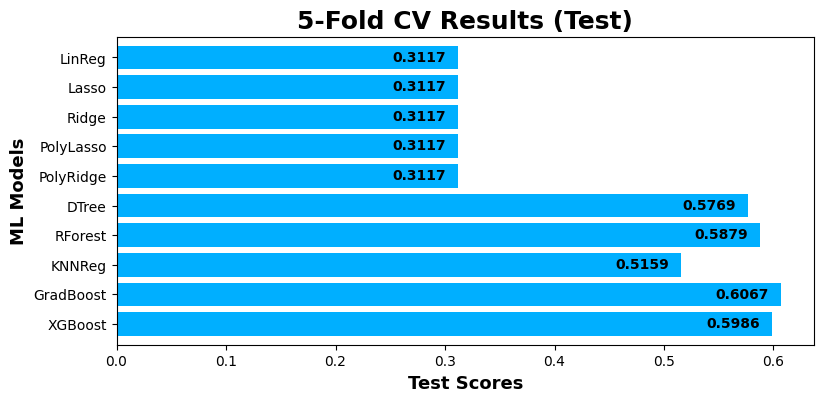

In [531]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_cv_test, color='#00afff')
plt.title("5-Fold CV Results (Test)", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('Test Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_cv_test[i]-0.06, i+0.12, "{:.4f}".format(res_cv_test[i]), fontweight='bold')
plt.show()